## Lab4 DataScrapping exercise:

### Dataset1 web scrapping using beautiful soup

For webscraping with beautiful, chose on an archived data from 2013 Ranking of the universities in the Bay Area to show how SCU being the oldest university has evolved through the competition.

Now holds a position of 22 in the Ranking among MSIS schools in California which is explained in dataset4.

In [136]:
from bs4 import BeautifulSoup
import requests
from IPython.display import Image

In [134]:
Data2 = requests.get('http://study.com/articles/Top_Ranked_School_for_Information_Technology_-_San_Jose_CA.html')
Data2.content

In [10]:
html_data = BeautifulSoup(Data2.content, 'html.parser')

In [133]:
print(html_data.prettify())

In [135]:
html_data.title

In [130]:
table = html_data.find('table')
print(table)

In [131]:
table_body = table.find('tbody')
print(table_body)

In [132]:
for row in table_body.find_all('tr'):
    for cell in row.find_all('td'):
        print(cell)

In [83]:
data = {
    'Category' : [],
    'Santa Clara University' : [],
    'San Jose State University' : [],
    'University of San Francisco' : []
}

table_names = ['Category','Santa Clara University','San Jose State University','University of San Francisco']
count = 0
for row in table_body.find_all('tr'):
    for cell in row.find_all('td'):
        #print( table_names[count%4] +":"+ cell.get_text())
        data[table_names[count%4]].append( cell.get_text() )
        count= count+1
    
import pandas as pd
Datascrap = pd.DataFrame(data)

Datascrap.to_csv('Dataset1.csv', index=False, encoding='utf-8')

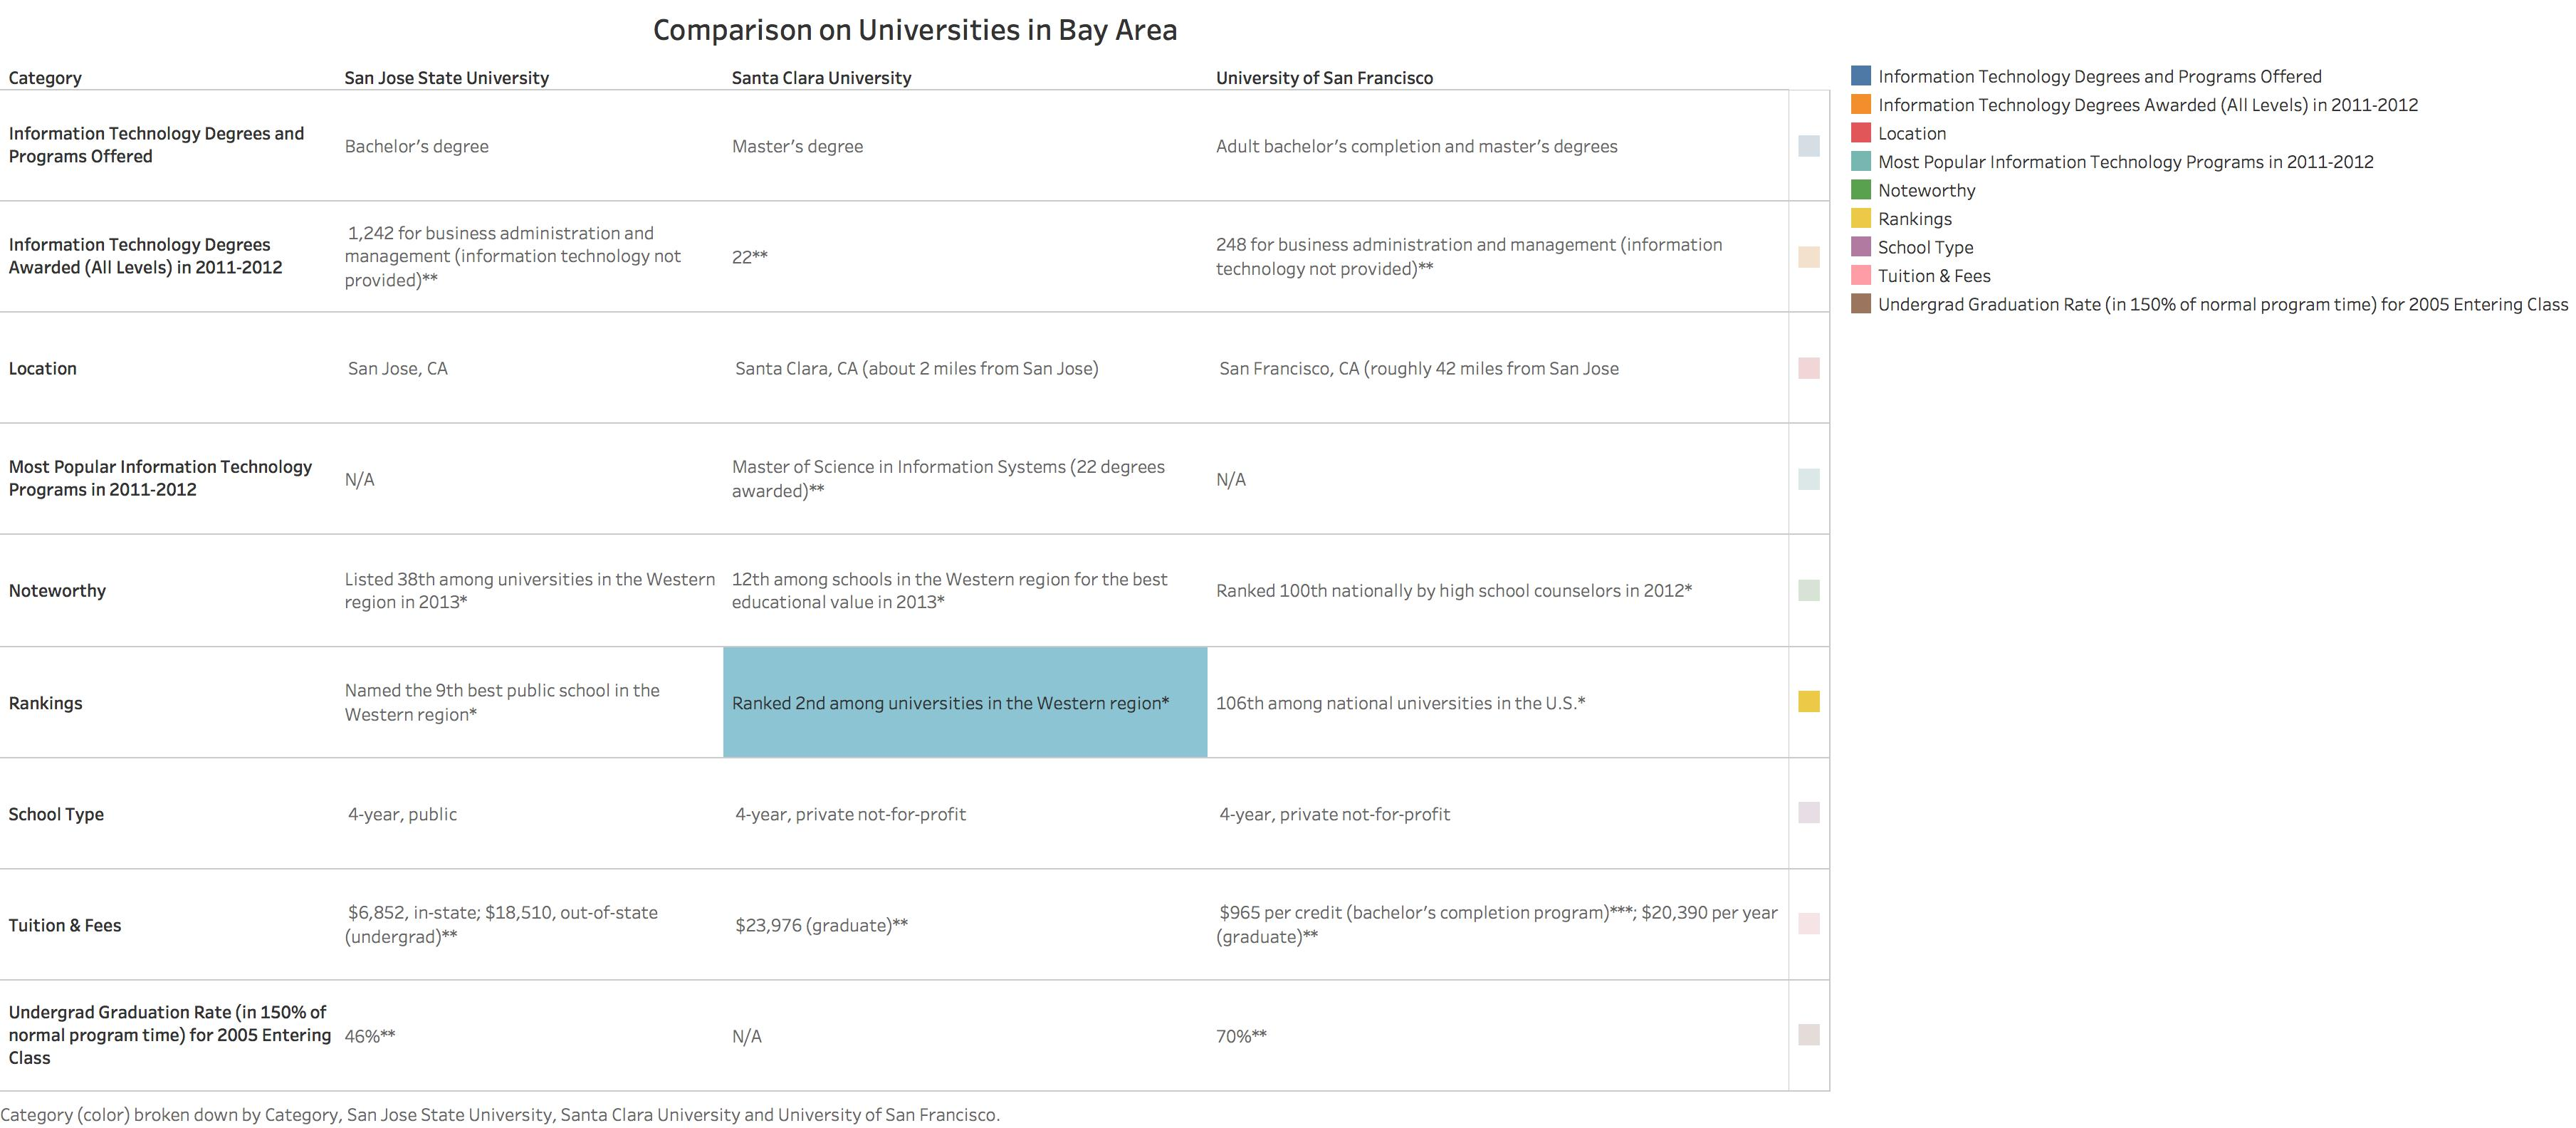

In [139]:
Image("Old_data.jpg")

### Dataset2 on the job positions for MSIS graduates

This dataset is an inviting source for prospective students to know on the career opportunities for MSIS graduates. Only with this information they will be able to move on with their choices on universities.

The data source is from https://www.payscale.com/research/US/Degree=Master_of_Information_Science_(MIS)/Salary. 

The website denied permissions from scrapping the data, hence got the HTML from the page source and used pandas datareader to convert it to csv.

In [95]:
import pandas as pd
Data3 = pd.read_html('Paysalary.html')

Data3 = Data3[0]
Data3.columns = ['MSIS Job positions', 'Average Salary', 'Min  Max']

#Removing rows with null values
Data3 = Data3.dropna(axis=0,how='any')

Data3.drop(Data3.index[:1], inplace=True)

Data3.to_csv('Dataset2.csv', index=False, encoding='utf-8')

### <img src='MSIS_PaySalary.jpg'>

### Dataset3 on Student Teacher Ratio and Enrolled students

With this data, the prospective students will get an information on where SCU MSIS course stands in terms of students enrolling and the ratio of student and teacher

The information was obtained from https://www.universities.com/find/california/best/management-information-systems-degrees, web data scraping was denied by the website so copied the page source to find the table tag and made a html out of it and used panda reader to get the csv file from the dataframe.

In [117]:
Data4 = pd.read_html('Lab4_Data3.html')
Data4 = Data4[0]

In [119]:
#Drop 'School Logo' column
del Data4['School Logo']

In [121]:
Data4.to_csv('Dataset4.csv', index=False, encoding='utf-8')

### <img src='Data2.jpg'>

### Data set4 on univeristy ranking

The data set3 is on MS IS course ranking across universities. From this recruiters can get information on the SCU stands and accordingly recruit students

In [122]:
import pandas as pd
url = 'http://higheredublog.com/top-universities-for-ms-in-mis-in-usa/'

data = pd.read_html(url, header = 0)

data1 = data[0]

data1.columns = ['RANKING', 'UNIVERSITY', 'PROGRAM']

df = pd.DataFrame(data1)
df.to_csv('univ_ranking.csv', index=False, encoding='utf-8')

<img src='Ranking.jpg'>